<a href="https://colab.research.google.com/github/SUBHADEEP1710/Movie-Genre-Classification/blob/master/movie_genre_class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing all libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

!kaggle datasets download -d hijest/genre-classification-dataset-imdb
!unzip /content/genre-classification-dataset-imdb.zip

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb
License(s): other
 86% 36.0M/41.7M [00:00<00:00, 98.2MB/s]
100% 41.7M/41.7M [00:00<00:00, 81.5MB/s]
Archive:  /content/genre-classification-dataset-imdb.zip
  inflating: Genre Classification Dataset/description.txt  
  inflating: Genre Classification Dataset/test_data.txt  
  inflating: Genre Classification Dataset/test_data_solution.txt  
  inflating: Genre Classification Dataset/train_data.txt  


In [ ]:
#loading dataset
columns = ['Movie Name', 'Genre', 'Description']

df_train = pd.read_csv('/content/Genre Classification Dataset/train_data.txt', delimiter=':::', engine='python', names=columns, index_col=0)
df_test = pd.read_csv('/content/Genre Classification Dataset/test_data_solution.txt', delimiter=':::', engine='python', names=columns, index_col=0)

In [ ]:
# data preprocessing
df_train.loc[:, 'Description'] = df_train['Description'].astype(str).str.lower()
df_test.loc[:, 'Description'] = df_test['Description'].astype(str).str.lower()

In [ ]:
df_train.drop(columns=['Movie Name'], inplace=True)
df_test.drop(columns=['Movie Name'], inplace=True)

df_train = df_train.drop_duplicates(keep='first')
df_test = df_test.drop_duplicates(keep='first')

In [ ]:
x_train_full = df_train['Description']
y_train_full = df_train['Genre']

x_test = df_test['Description']
y_test = df_test['Genre']

<ipython-input-7-bcc9ab6fd5d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df_train, order=df_train['Genre'].value_counts().index, palette='viridis')


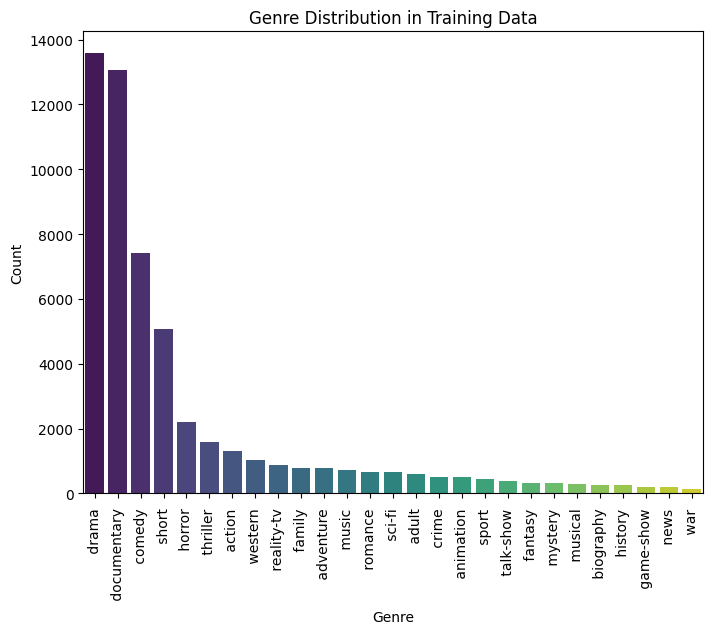

In [ ]:
# plotting the distribution of training dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_train, order=df_train['Genre'].value_counts().index, palette='viridis')
plt.title('Genre Distribution in Training Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<ipython-input-8-4598f85fc4cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=df_test, order=df_test['Genre'].value_counts().index, palette='pastel')


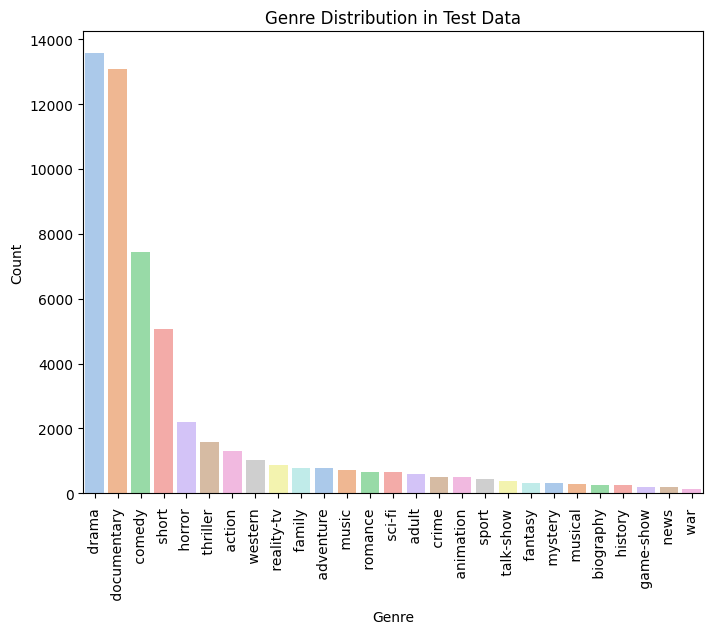

In [ ]:
# plotting the distribution of testing dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Genre', data=df_test, order=df_test['Genre'].value_counts().index, palette='pastel')
plt.title('Genre Distribution in Test Data')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


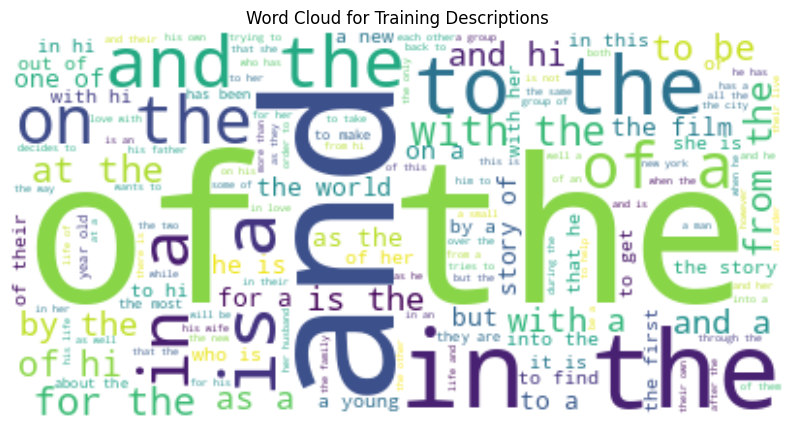

In [ ]:
# plotting word cloud
text = " ".join(description for description in df_train['Description'])
wordcloud = WordCloud(stopwords='english', background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Training Descriptions')
plt.show()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# TF-IDF VECTORIZER
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_val_vec = tfidf.transform(X_val)
X_test_vec = tfidf.transform(x_test)

def train_and_evaluate(model, X_train, Y_train, X_val, Y_val):
    model.fit(X_train, Y_train)
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(Y_val, y_pred_val)
    f1_val = f1_score(Y_val, y_pred_val, average='weighted')
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Validation F1 Score: {f1_val}")
    print("Validation Classification Report:")
    print(classification_report(Y_val, y_pred_val, zero_division=0))



In [ ]:
# LR
print("\nLogistic Regression:")
lr = LogisticRegression(max_iter=500)
train_and_evaluate(lr, X_train_vec, Y_train, X_val_vec, Y_val)


Logistic Regression:
Validation Accuracy: 0.5844191849182145
Validation F1 Score: 0.5425652459415381
Validation Classification Report:
               precision    recall  f1-score   support

      action        0.38      0.20      0.27       271
       adult        0.65      0.20      0.31       118
   adventure        0.57      0.16      0.25       141
   animation        0.64      0.11      0.18        84
   biography        0.00      0.00      0.00        54
      comedy        0.51      0.59      0.55      1445
       crime        0.45      0.06      0.10        88
 documentary        0.68      0.86      0.76      2685
       drama        0.55      0.78      0.64      2720
      family        0.77      0.12      0.20       145
     fantasy        0.00      0.00      0.00        57
   game-show        0.82      0.45      0.58        40
     history        0.00      0.00      0.00        52
      horror        0.65      0.58      0.61       429
       music        0.72      0.39    